<a href="https://colab.research.google.com/github/sangajayasurya/fraud/blob/main/Fraud_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense
from matplotlib import gridspec


In [ ]:
dat=pd.read_csv('/content/creditcard.csv')
dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
dat.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37717,39076,1.117749,-1.544665,-0.145357,-1.307482,-1.392833,-0.630833,-0.563659,-0.038716,-2.173892,1.561434,1.375139,-1.061420,-1.753850,0.635604,0.078165,-0.695348,0.876914,-0.299744,-0.153620,-0.155026,-0.334155,-1.108220,0.070461,0.115485,0.078726,-0.460844,-0.029143,0.029028,183.19,0.0
37718,39076,0.758729,-0.483875,0.125488,1.449159,-0.639231,-0.805011,0.406994,-0.221212,0.068777,-0.027164,-0.540305,-0.211977,-0.651315,0.529539,1.048556,0.216319,-0.423403,0.070802,-0.548487,0.311815,0.210712,0.063091,-0.316636,0.394472,0.558720,-0.304812,-0.033008,0.063331,250.00,0.0
37719,39076,-0.474907,0.835804,0.075878,-1.251283,2.492736,3.385419,0.169507,0.934749,-0.584224,-0.286547,-0.195320,-0.268205,-0.062458,0.307645,1.036639,0.500993,-0.881358,0.111643,0.426545,0.226808,-0.270398,-0.866353,-0.085720,0.986274,-0.082934,0.084198,0.310936,0.170342,1.49,0.0
37720,39077,-2.682780,-2.028562,1.745223,-1.157952,-0.143692,-0.807503,-1.154141,0.436917,-0.293442,0.078251,-0.691762,-0.753092,-0.287884,-0.617361,0.121762,1.247606,0.393749,-1.339760,-0.568519,0.103584,0.353396,0.968145,-0.776459,0.182662,-0.000427,-0.209058,0.256991,-0.585781,102.00,0.0
37721,39077,1.106292,-0.525727,0.926440,0.817696,-1.122177,-0.062703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Information

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37722 entries, 0 to 37721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37722 non-null  int64  
 1   V1      37722 non-null  float64
 2   V2      37722 non-null  float64
 3   V3      37722 non-null  float64
 4   V4      37722 non-null  float64
 5   V5      37722 non-null  float64
 6   V6      37722 non-null  float64
 7   V7      37721 non-null  float64
 8   V8      37721 non-null  float64
 9   V9      37721 non-null  float64
 10  V10     37721 non-null  float64
 11  V11     37721 non-null  float64
 12  V12     37721 non-null  float64
 13  V13     37721 non-null  float64
 14  V14     37721 non-null  float64
 15  V15     37721 non-null  float64
 16  V16     37721 non-null  float64
 17  V17     37721 non-null  float64
 18  V18     37721 non-null  float64
 19  V19     37721 non-null  float64
 20  V20     37721 non-null  float64
 21  V21     37721 non-null  float64
 22

In [ ]:
dat.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
dat['Class'].value_counts()

0.0    37618
1.0      103
Name: Class, dtype: int64

In [ ]:
legit = dat[dat.Class == 0]
fraud = dat[dat.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(37618, 31)
(103, 31)


In [ ]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.000000,37618.0
mean,24778.212797,-0.186787,0.044196,0.749331,0.176750,-0.209569,0.105912,-0.092989,0.025693,0.243321,-0.061152,0.424604,-0.479428,0.271560,0.275963,0.090902,0.010825,0.179736,-0.081284,-0.036277,0.044683,-0.032046,-0.111604,-0.040404,0.007159,0.135739,0.021382,0.007030,0.003658,86.017411,0.0
std,12531.376600,1.716898,1.493506,1.298146,1.365780,1.304513,1.299853,1.126285,1.170033,1.215493,1.052640,1.090698,1.318834,1.152701,1.032409,0.957491,0.875895,0.905657,0.835178,0.814450,0.679896,0.757861,0.638263,0.539669,0.593848,0.431880,0.505779,0.380119,0.297435,232.957939,0.0
min,0.000000,-28.344757,-40.978852,-27.747084,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-4.532523,-11.208723,-2.985309,-15.144988,-3.808724,-13.780377,-4.152532,-10.115560,-17.098444,-5.366660,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.0
25%,13921.500000,-0.958848,-0.515665,0.244377,-0.718145,-0.824624,-0.635550,-0.592966,-0.154442,-0.538162,-0.555004,-0.382278,-1.412125,-0.509960,-0.251297,-0.467907,-0.487703,-0.335156,-0.561439,-0.526981,-0.162756,-0.238519,-0.534293,-0.178318,-0.327452,-0.127279,-0.331443,-0.063373,-0.007031,7.300000,0.0
50%,29847.500000,-0.228817,0.104358,0.824898,0.182325,-0.260153,-0.157014,-0.071476,0.045215,0.112225,-0.134091,0.405822,-0.137515,0.193511,0.212693,0.211591,0.063675,0.099963,-0.070930,-0.035256,-0.022791,-0.079724,-0.085473,-0.052067,0.061502,0.176030,-0.064459,0.008398,0.021215,22.880000,0.0
75%,34943.750000,1.161976,0.741719,1.453821,1.066060,0.300653,0.489251,0.436030,0.309031,0.964073,0.370337,1.217898,0.478870,1.023498,0.863807,0.769840,0.559179,0.590956,0.407287,0.472597,0.166831,0.096404,0.298301,0.076237,0.399066,0.421030,0.299680,0.084707,0.075122,77.675000,0.0
max,39077.000000,1.960497,14.845545,4.101716,13.143668,34.099309,22.529298,36.677268,17.573712,10.392889,12.701539,10.002190,4.846452,4.465413,7.692209,3.832930,6.098529,9.253526,4.295648,4.555359,17.281859,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,0.0


In [ ]:
legit.Amount.describe()

count    37618.000000
mean        86.017411
std        232.957939
min          0.000000
25%          7.300000
50%         22.880000
75%         77.675000
max       7879.420000
Name: Amount, dtype: float64

In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0
mean,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,-6.700936,5.501599,-8.404377,0.413922,-8.354800,-0.029473,-4.949284,-8.060624,-2.865933,0.477900,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165,1.0
std,10224.604576,9.408942,4.799564,9.670659,2.851973,6.964496,1.617578,7.153267,6.233428,2.268143,4.128218,3.069263,4.418191,0.889796,4.492785,0.795429,3.543596,6.316090,2.654066,1.474923,0.906939,1.304033,0.916843,2.110441,0.520297,1.197724,0.379063,1.106307,0.656762,247.173335,0.0
min,406.000000,-30.552380,-5.198360,-31.103685,0.817253,-22.105532,-4.977692,-21.922811,-3.277535,-7.175097,-14.166795,-0.414575,-17.769143,-2.648076,-19.214325,-2.086989,-12.227189,-18.587366,-8.061208,-3.286150,-3.042626,-2.475962,-2.288686,-19.254328,-1.632653,-4.781606,-0.657488,-3.908080,-1.869290,0.000000,1.0
25%,11086.000000,-15.609012,2.536706,-20.883401,3.816369,-9.646293,-3.337874,-15.535968,0.132350,-4.266357,-8.984526,3.555128,-10.872992,-0.019215,-10.712525,-0.419534,-7.551854,-13.080863,-4.893749,-0.456116,0.234694,0.184108,-0.911406,-0.660823,-0.573174,-0.328146,-0.209664,0.291864,0.044583,1.000000,1.0
50%,20451.000000,-3.499108,4.140867,-6.240697,6.038515,-2.726961,-2.332285,-5.283435,1.202270,-3.565738,-6.810813,4.901683,-7.839539,0.543068,-7.891909,-0.054434,-5.367775,-10.961410,-4.480413,0.650807,0.576656,0.667927,-0.278485,-0.142812,-0.067195,0.185751,0.271139,0.737040,0.308205,3.760000,1.0
75%,28641.500000,-0.360399,8.921805,-3.445622,6.600628,-0.293699,-1.239059,-1.660418,4.129892,-1.175255,-3.684438,7.087329,-5.921868,1.042881,-5.455295,0.470263,-2.370139,-3.377071,-0.472371,1.296629,1.472367,1.757763,0.255747,0.303033,0.143699,1.336526,0.521196,1.579706,0.483431,99.990000,1.0
max,37167.000000,1.234235,16.713389,2.041003,11.927512,3.738853,3.628382,5.431271,20.007208,2.820829,3.245086,12.018913,1.237773,1.733917,1.500794,2.000635,2.581851,6.739384,3.042493,3.623332,2.102339,2.839596,1.745315,1.752227,0.645545,2.208209,0.816762,3.052358,1.108933,1809.680000,1.0


In [ ]:
fraud.Amount.describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

Comparing both classes

In [ ]:
dat.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,24778.212797,-0.186787,0.044196,0.749331,0.176750,-0.209569,0.105912,-0.092989,0.025693,0.243321,-0.061152,0.424604,-0.479428,0.271560,0.275963,0.090902,0.010825,0.179736,-0.081284,-0.036277,0.044683,-0.032046,-0.111604,-0.040404,0.007159,0.135739,0.021382,0.007030,0.003658,86.017411
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,-6.700936,5.501599,-8.404377,0.413922,-8.354800,-0.029473,-4.949284,-8.060624,-2.865933,0.477900,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


In [ ]:
legit_sample=legit.sample(n=500)

Forming a new dataset

In [ ]:
dataset = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5183,4938,-1.255693,1.390748,1.522071,-0.588783,0.242125,-0.363430,0.520124,0.022160,1.141925,-0.140775,2.536202,-1.768463,1.263542,1.641794,-0.852501,0.274772,0.083876,-0.206774,-1.215896,-0.039546,-0.236890,-0.496864,0.062389,0.126319,-0.550382,-0.189837,0.008218,0.236298,1.98,0.0
29166,35348,-2.844066,2.789421,0.079143,-2.122488,-0.233289,-0.761537,0.633062,-0.103451,2.493477,3.223439,-0.753409,0.043246,0.693217,-1.295698,0.714009,0.523664,-1.237667,-0.386475,-0.813583,1.725518,-0.549800,-0.602888,-0.023985,-0.450058,0.467704,0.797726,1.267916,0.557663,0.77,0.0
1523,1191,0.970661,-0.316853,1.167245,1.764797,-0.734597,0.628086,-0.437141,0.252002,1.196801,-0.452362,-1.052385,1.152832,0.059468,-0.792695,-1.731305,-1.154018,0.758047,-1.381070,0.154250,-0.073448,-0.377612,-0.723429,0.030925,0.093137,0.415758,-0.516817,0.082683,0.039292,67.23,0.0
20951,31373,1.165221,0.093792,0.112002,0.475063,-0.110208,-0.116998,-0.182743,0.183729,0.014511,-0.120574,1.302594,0.111644,-1.298158,0.215259,0.834097,0.551284,-0.014104,0.040860,-0.135854,-0.156523,-0.238663,-0.793364,0.110363,-0.393744,0.102438,0.130819,-0.023211,0.013140,16.00,0.0
11083,19154,1.173830,0.017338,0.299050,0.094211,-0.043930,0.108106,-0.299835,0.106803,1.224242,-0.381728,2.723479,-1.837238,0.921805,2.112332,0.131338,-0.222441,0.807051,-0.536942,-0.630202,-0.213147,-0.076970,0.057284,0.033337,-0.278483,0.166480,1.044038,-0.092209,-0.025297,4.05,0.0


In [ ]:
x = dataset.drop(columns='Class',axis=1)
y = dataset['Class']

In [ ]:
print(x)

        Time        V1        V2  ...       V27       V28  Amount
5183    4938 -1.255693  1.390748  ...  0.008218  0.236298    1.98
29166  35348 -2.844066  2.789421  ...  1.267916  0.557663    0.77
1523    1191  0.970661 -0.316853  ...  0.082683  0.039292   67.23
20951  31373  1.165221  0.093792  ... -0.023211  0.013140   16.00
11083  19154  1.173830  0.017338  ... -0.092209 -0.025297    4.05
...      ...       ...       ...  ...       ...       ...     ...
30442  35926 -3.896583  4.518355  ...  0.635789  0.501050    4.56
30473  35942 -4.194074  4.382897  ...  0.473934  0.473757   14.46
30496  35953 -4.844372  5.649439  ...  0.210214  0.391855  111.70
31002  36170 -5.685013  5.776516  ...  0.303445  0.219380  111.70
33276  37167 -7.923891 -5.198360  ...  1.937421 -1.552593   12.31

[603 rows x 30 columns]


In [ ]:
print(y)

5183     0.0
29166    0.0
1523     0.0
20951    0.0
11083    0.0
        ... 
30442    1.0
30473    1.0
30496    1.0
31002    1.0
33276    1.0
Name: Class, Length: 603, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(603, 30) (482, 30) (121, 30)


Model Training

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_prediction,y_train)

In [ ]:
print("Training accuracy = ",training_data_accuracy)

Training accuracy =  0.970954356846473


In [ ]:
y_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test_prediction,y_test)

In [ ]:
print("Testing accuracy =",test_data_accuracy)

Testing accuracy = 0.9504132231404959


Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# predictions
yPred = rfc.predict(x_test)

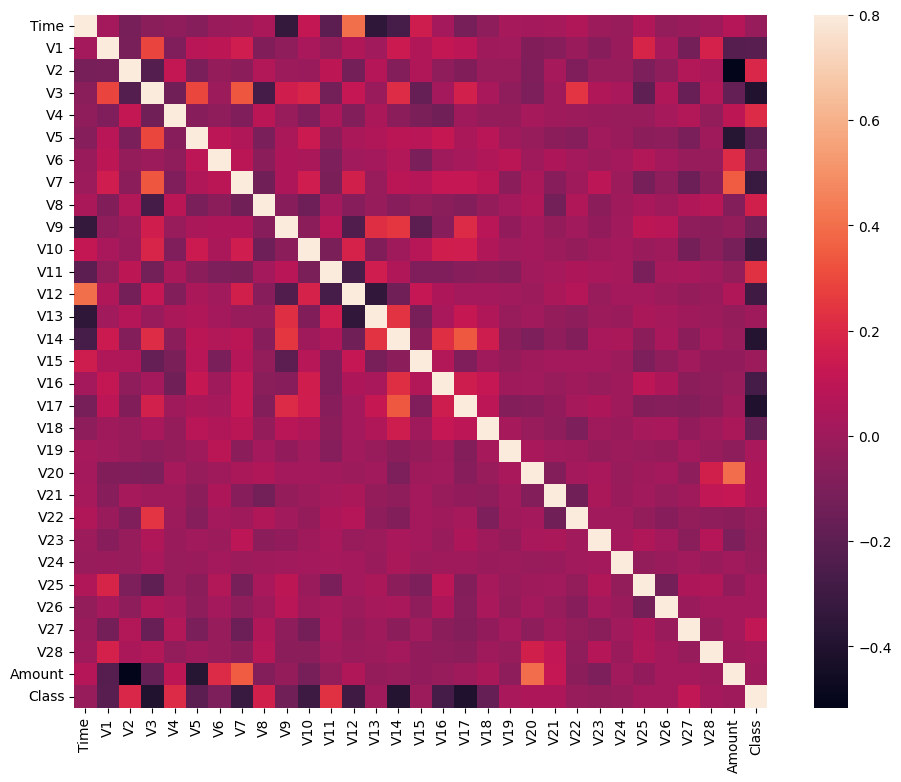

In [ ]:
corrmat = dat.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
X = dat.drop(['Class'], axis = 1)
Y = dat["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(37722, 30)
(37722,)


Confusion Matrix

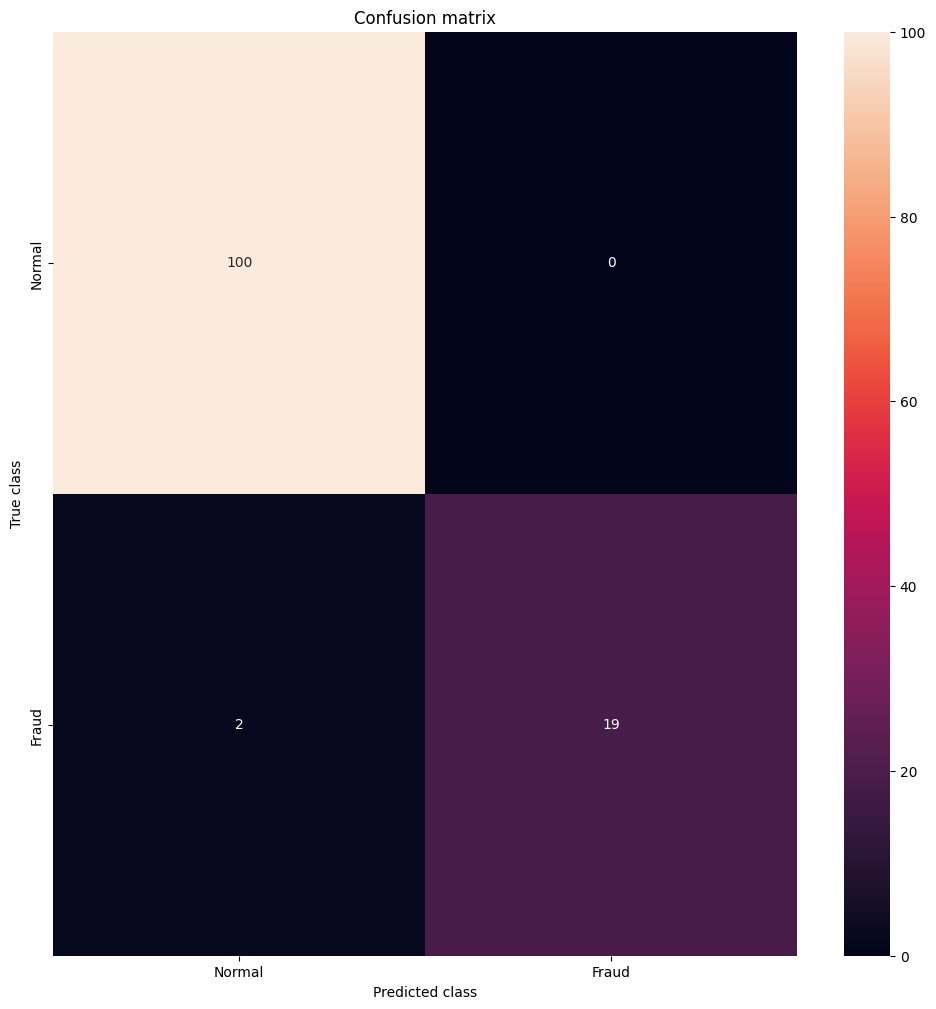

In [ ]:
from sklearn.metrics import confusion_matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()